# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from imblearn.over_sampling import RandomOverSampler




## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [3]:
#read csv file
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')


In [4]:
df.shape

(147972, 21)

In [5]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Busbreakdown_ID,147972.0,1.287779e+06,43243.382164,1212681.0,1250437.75,1287843.5,1325191.25,1362605.0
Number_Of_Students_On_The_Bus,147972.0,3.590071e+00,55.365859,0.0,0.00,0.0,4.00,9007.0


In [8]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [9]:
df.duplicated().sum()

0

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [10]:
#handling missing value
df.dropna(inplace=True)
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [11]:
#now i will remove some coulmns i don't need in my model
df.drop('Busbreakdown_ID', axis=1, inplace=True)
df.drop('Run_Type', axis=1, inplace=True)
df.drop('School_Year', axis=1, inplace=True)
df.drop('Schools_Serviced', axis=1, inplace=True)
df.drop('Number_Of_Students_On_The_Bus', axis=1, inplace=True)
df.drop('Boro', axis=1, inplace=True)
df.drop('School_Age_or_PreK', axis=1, inplace=True)
df.drop('Created_On', axis=1, inplace=True)
df.drop('Bus_Company_Name', axis=1, inplace=True)

In [12]:
print(df.columns)

Index(['Bus_No', 'Route_Number', 'Reason', 'Occurred_On', 'How_Long_Delayed',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late'],
      dtype='object')


In [13]:
#now i will use label wncoder to change the type of data so i can do scaling on them
label_encoder = LabelEncoder()
df["Route_Number"] = label_encoder.fit_transform(df["Route_Number"])
df["Reason"] = label_encoder.fit_transform(df["Reason"])
df["Occurred_On"] = label_encoder.fit_transform(df["Occurred_On"])
df["How_Long_Delayed"] = label_encoder.fit_transform(df["How_Long_Delayed"])
df["Has_Contractor_Notified_Schools"] = label_encoder.fit_transform(df["Has_Contractor_Notified_Schools"])
df["Has_Contractor_Notified_Parents"] = label_encoder.fit_transform(df["Has_Contractor_Notified_Parents"])
df["Have_You_Alerted_OPT"] = label_encoder.fit_transform(df["Have_You_Alerted_OPT"])
df["Informed_On"] = label_encoder.fit_transform(df["Informed_On"])
df["Last_Updated_On"] = label_encoder.fit_transform(df["Last_Updated_On"])
df["Breakdown_or_Running_Late"] = label_encoder.fit_transform(df["Breakdown_or_Running_Late"])
df["Bus_No"] = label_encoder.fit_transform(df["Bus_No"])
df["Incident_Number"] = label_encoder.fit_transform(df["Incident_Number"])

In [14]:
df

,Bus_No,Route_Number,Reason,Occurred_On,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late
1375,209,473,0,4254,195,1,1,1,4387,29,4535,1
1842,407,258,0,4015,271,1,1,1,4143,8,4289,1
2587,905,1126,0,4266,93,1,0,1,4400,30,4547,1
3153,637,56,0,4268,324,1,1,1,4401,32,4549,1
3367,34,1067,0,3941,263,1,1,1,4067,5,4213,1
...,...,...,...,...,...,...,...,...,...,...,...,...
147153,399,196,3,3174,96,1,1,1,3262,3883,3405,1
147201,959,1074,3,3506,181,1,0,1,3611,4027,3752,1
147244,936,1103,3,3284,54,1,1,1,3378,3916,3515,1
147276,923,1140,3,3390,111,1,1,1,3489,3975,3627,1


In [15]:
#now i change data type so i can do scaling next
df ["Bus_No"]=df ["Bus_No"].astype("int")
df ["Route_Number"]=df ["Route_Number"].astype("int")
df ["Reason"]=df ["Reason"].astype("int")
df ["How_Long_Delayed"]=df ["How_Long_Delayed"].astype("int")
df ["Has_Contractor_Notified_Schools"]=df ["Has_Contractor_Notified_Schools"].astype("int")
df ["Has_Contractor_Notified_Parents"]=df ["Has_Contractor_Notified_Parents"].astype("int")
df ["Have_You_Alerted_OPT"]=df ["Have_You_Alerted_OPT"].astype("int")
df ["Informed_On"]=df ["Informed_On"].astype("int")
df ["Last_Updated_On"]=df ["Last_Updated_On"].astype("int")



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 1375 to 147969
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Bus_No                           5024 non-null   int64
 1   Route_Number                     5024 non-null   int64
 2   Reason                           5024 non-null   int64
 3   Occurred_On                      5024 non-null   int64
 4   How_Long_Delayed                 5024 non-null   int64
 5   Has_Contractor_Notified_Schools  5024 non-null   int64
 6   Has_Contractor_Notified_Parents  5024 non-null   int64
 7   Have_You_Alerted_OPT             5024 non-null   int64
 8   Informed_On                      5024 non-null   int64
 9   Incident_Number                  5024 non-null   int64
 10  Last_Updated_On                  5024 non-null   int64
 11  Breakdown_or_Running_Late        5024 non-null   int64
dtypes: int64(12)
memory usage: 510.2 KB


In [17]:
#check and remove dupicates
df.duplicated().sum()

0

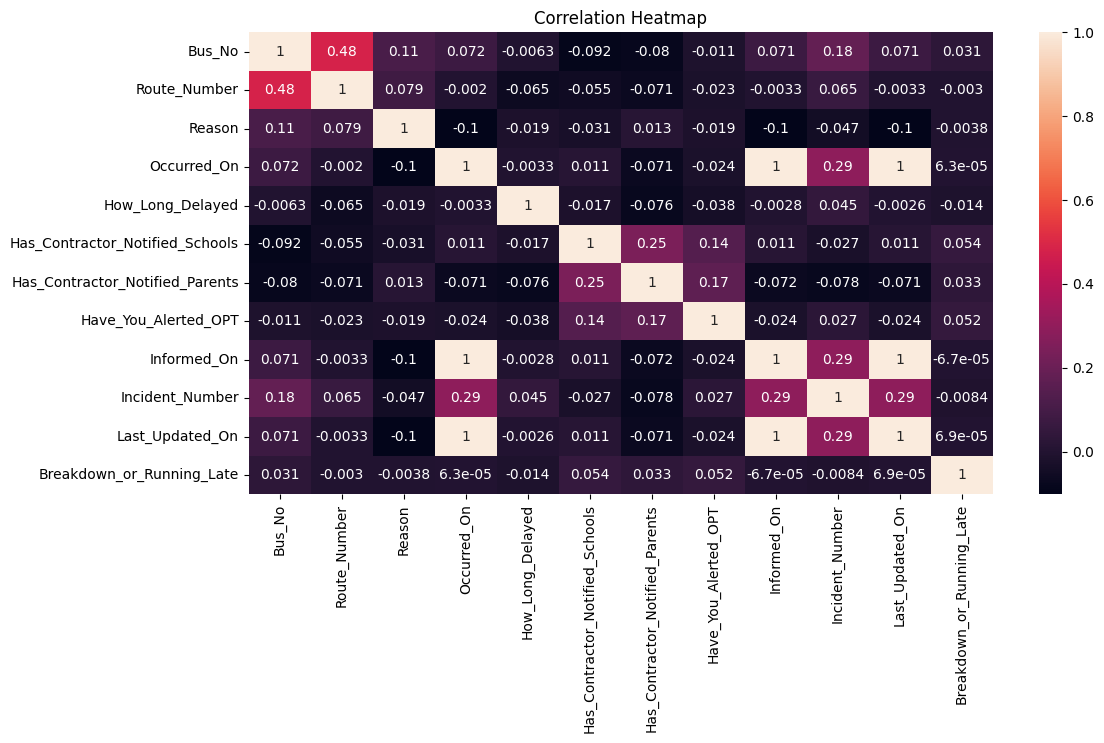

In [18]:
#i will do Heatmap plot
correlation_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df.value_counts()

Bus_No  Route_Number  Reason  Occurred_On  How_Long_Delayed  Has_Contractor_Notified_Schools  Has_Contractor_Notified_Parents  Have_You_Alerted_OPT  Informed_On  Incident_Number  Last_Updated_On  Breakdown_or_Running_Late
0       699           6       3982         72                1                                0                                1                     4112         2238             4258             1                            1
840     327           3       3870         133               1                                1                                1                     3992         2133             4140             1                            1
        911           3       1493         26                1                                1                                1                     1526         3231             1576             1                            1
                              1330         286               1                                1                                1                     1363         3166             1390             1                            1
                              1298         286               1                                1                                1                     1330         3149             1365             1                            1
                                                                                                                                                                                                                                ..
375     183           3       357          17                1                                1                                1                     372          225              375              1                            1
                              325          48                1                                1                                1                     335          201              335              1                            1
                              294          17                1                                1                                1                     303          183              307              1                            1
                              257          96                1                                1                                1                     265          154              262              1                            1
1218    561           3       412          16                0                                1                                1                     429          2883             435              1                            1
Name: count, Length: 5024, dtype: int64

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [20]:
#now i will split the data then i will Handle Imbalanced Data
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#here i did scaling on Xtrin and Teset becuse y contine the catogrical value so if i did scalit it's wont be smapling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
#here i will handel imblanced data using undersampling methoud
ros = RandomOverSampler(random_state=42)
X_resampl, y_resampl = ros.fit_resample(X, y)

In [24]:
#i will show the data befor sampling
print("Original dataset shape:", X.shape)

Original dataset shape: (5024, 11)


In [25]:
#now i will print the sampling
print("Resampled dataset shape:", X_resampl.shape)

Resampled dataset shape: (10044, 11)


<Axes: xlabel='Breakdown_or_Running_Late', ylabel='count'>

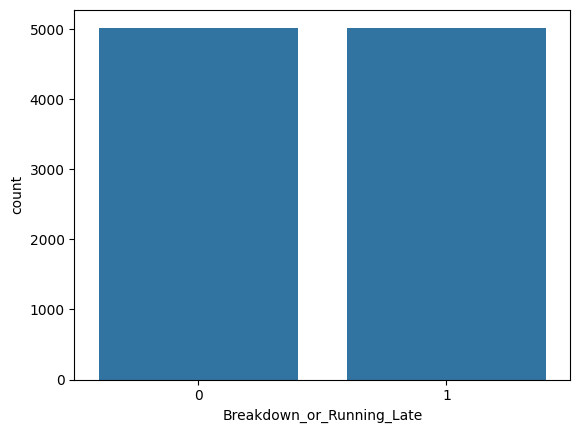

In [26]:
#here i print vusaliztion show the resampling of the y
sns.countplot(x=y_resampl)

In [27]:
#i split the data into X train and y traine
X_train, X_test, y_train, y_test = train_test_split(X_resampl, y_resampl, test_size=0.2, random_state=42)

In [28]:
df["Breakdown_or_Running_Late"]

,Breakdown_or_Running_Late
1375,1
1842,1
2587,1
3153,1
3367,1
...,...
147153,1
147201,1
147244,1
147276,1


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [72]:
#here i will start bulding my model after i did split the data and do undersampling on it
seq=Sequential()

#first i will add input layer
seq.add(Dense(units=7, input_dim=X_train.shape[1], activation='relu'))
#here i add hddin layer
seq.add(Dense(units=5, activation='relu'))
seq.add(Dense(units=5, activation='relu'))

#here i add out put layer
seq.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [73]:
#i used here binary calss becuse i do have onely 2 classes breck dwon or running late
seq.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [74]:
#here i traine the data
seq.fit(X_train, y_train, epochs=50, batch_size=20)


Epoch 1/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5608 - loss: 32.9098
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7163 - loss: 0.6051
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7195 - loss: 0.5777
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7255 - loss: 0.5566
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7403 - loss: 0.5303
Epoch 6/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7364 - loss: 0.5255
Epoch 7/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7418 - loss: 0.5056
Epoch 8/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7371 - loss: 0.5025
Epoch 9/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7365 - loss: 0.5034
Epoch 10/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7331 - loss: 0.5000
Epoch 11/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7478 - loss: 0.4852
Epoch 12/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [75]:
#here i will Evaluate the model
seq.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9526 - loss: 0.1354


[0.1413497030735016, 0.9492284655570984]

In [76]:
#here i will print the model summry
seq.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482 (1.89 KB)

 Trainable params: 160 (640.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322 (1.26 KB)

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [77]:
#here i maked predication on x_test
y_pred=seq.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [78]:
#here i print classifcation report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.49      1.00      0.65       978
           1       0.00      0.00      0.00      1031

    accuracy                           0.49      2009
   macro avg       0.24      0.50      0.33      2009
weighted avg       0.24      0.49      0.32      2009



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


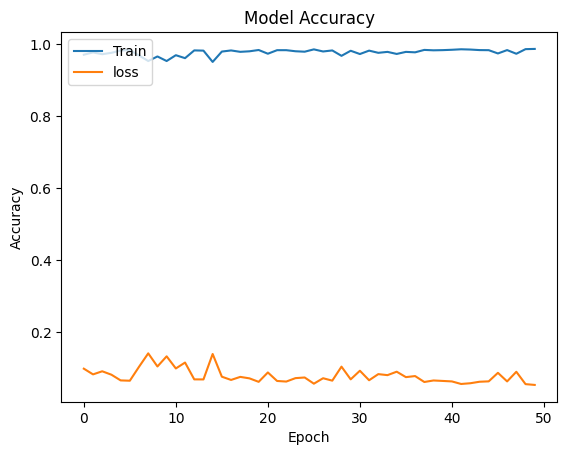

In [80]:
#here i show the accurcy and recall plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'loss'], loc='upper left')

## Save the Model
Save the trained model for submission.

In [53]:
seq.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
#1-becuse when you prepered your data and using the right preprocess it's will help the model predict right and the outcomes from your data will be acuurit

#2-when you difend your nerouns and your layer it's means that you give your model number of nures that fit the data , so if you have simple data like irisi that we used in lap we know that the data no need to make the model complix so we used less neroun and hiddn layer , so we can privent overfitting

#3- the batch size number whn i choose it to be 10 the model was giving me low accurit and hight loss so when i make it 20 model start raise the accurcy and low the loss also i difend the binary contropasy becuse i have to classes in y colum so the predic was doing better with it btter than softmax and i run the model more than 6 times to see how the model working and was giving me accurcy around 90%

#4- i choose matrices to see how the model work and witch metrices it's the best with my model

#5-didn't used them in my model

#6- i used accurcy and loss and also i add classification report to see all matrices number with model , but i used accurcy like we did in the lab so i can see how accurt the modell will predict and how much loss the model will have from the predict

#8- i see the data containe overfitting becuse after i convert the data by using label encoding and do procees and drop some colum data hase been simple so the accurcy will be around 98% and above so i see it's over fitting , and if you check in the last part in the plot the model accurcy and losse